In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DSMarket/df_final_PK")


In [4]:
df.head()

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.74,2013-07-15,"7,644.84"
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,493,2011-25,5.28,2011-06-20,"2,603.09"
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,288,2014-05,3.95,2014-02-03,"1,137.63"
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,3288,2011-10,5.77,2011-03-07,"18,978.99"
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,1849,2011-21,3.96,2011-05-23,"7,328.33"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           30490 non-null  object        
 1   item         30490 non-null  object        
 2   category     30490 non-null  object        
 3   department   30490 non-null  object        
 4   store        30490 non-null  object        
 5   store_code   30490 non-null  object        
 6   region       30490 non-null  object        
 7   sales_total  30490 non-null  int64         
 8   yearweek     30490 non-null  object        
 9   sell_price   30490 non-null  float64       
 10  date         30490 non-null  datetime64[ns]
 11  Revenue      30490 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 2.8+ MB


In [6]:
df['id'].value_counts()

id
ACCESORIES_1_001_NYC_1       1
SUPERMARKET_2_202_BOS_3      1
SUPERMARKET_2_214_BOS_3      1
SUPERMARKET_2_213_BOS_3      1
SUPERMARKET_2_212_BOS_3      1
                            ..
HOME_&_GARDEN_1_457_NYC_4    1
HOME_&_GARDEN_1_456_NYC_4    1
HOME_&_GARDEN_1_455_NYC_4    1
HOME_&_GARDEN_1_454_NYC_4    1
SUPERMARKET_3_827_PHI_3      1
Name: count, Length: 30490, dtype: int64

In [7]:
df['item'].value_counts()

item
ACCESORIES_1_001       10
SUPERMARKET_2_210      10
SUPERMARKET_2_201      10
SUPERMARKET_2_202      10
SUPERMARKET_2_203      10
                       ..
HOME_&_GARDEN_1_464    10
HOME_&_GARDEN_1_465    10
HOME_&_GARDEN_1_466    10
HOME_&_GARDEN_1_467    10
SUPERMARKET_3_827      10
Name: count, Length: 3049, dtype: int64

In [8]:
##posibles nuevas variables:
'''
-max_venta
-min_venta
-mean_venta
-fecha ultima compra
-mes_compra
-compra por semanas
-agrupando por ventas podemos sacar por ejem, los 15 items mas populares:
most_important_item = df.groupby(['item'])['sales_total'].size().sort_values().tail(15).index.tolist()
df['top_items']=df['item'].isin(most_important_item)
- agrupar los items por sell_price por fecha para ver como cambia a lo largo tiempo
##sell_price_evolution= df.groupby(['item', 'date'])['sell_price'].size().sort_values().tail(15).index.tolist()
df["sell_price_evolution"] = df.groupby(['item', 'date'])['sell_price'].transform(np.mean)
df["sell_price_evolution"] = df.groupby(['item', 'date'])['sales_total'].transform(np.sum)

-agrupando podemos sacar el weekday que mas se vende un item
'''

'\n-max_venta\n-min_venta\n-mean_venta\n-fecha ultima compra\n-mes_compra\n-compra por semanas\n-agrupando por ventas podemos sacar por ejem, los 15 items mas populares:\nmost_important_item = df.groupby([\'item\'])[\'sales_total\'].size().sort_values().tail(15).index.tolist()\ndf[\'top_items\']=df[\'item\'].isin(most_important_item)\n- agrupar los items por sell_price por fecha para ver como cambia a lo largo tiempo\n##sell_price_evolution= df.groupby([\'item\', \'date\'])[\'sell_price\'].size().sort_values().tail(15).index.tolist()\ndf["sell_price_evolution"] = df.groupby([\'item\', \'date\'])[\'sell_price\'].transform(np.mean)\ndf["sell_price_evolution"] = df.groupby([\'item\', \'date\'])[\'sales_total\'].transform(np.sum)\n\n-agrupando podemos sacar el weekday que mas se vende un item\n'

In [9]:
most_important_item = df.groupby(['item'])['sales_total'].size().sort_values().tail(15).index.tolist()


In [10]:
df['top_items']=df['item'].isin(most_important_item)


In [11]:
df['top_items'].value_counts()

top_items
False    30340
True       150
Name: count, dtype: int64

In [12]:
less_important_items = df.groupby(['item'])['sales_total'].size().sort_values().head(15).index.tolist()
df['less_items']=df['item'].isin(less_important_items)


In [13]:
df['less_items'].value_counts()

less_items
False    30340
True       150
Name: count, dtype: int64

In [14]:
df["sell_price_evolution"] = df.groupby(['item', 'date'])['sell_price'].transform(np.mean)


In [15]:
df['sell_price_evolution']. nunique()

1787

In [16]:
df['sell_price'].nunique()

1031

In [17]:
df.tail(3)

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue,top_items,less_items,sell_price_evolution
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,1712,2011-05,4.80,2011-01-31,"8,217.60",False,False,4.80
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,702,2013-34,1.54,2013-08-26,"1,078.27",False,False,1.54
30489,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,1329,2014-09,1.20,2014-03-03,"1,594.80",True,False,1.20


In [18]:
aggregated_Revenue = df.groupby('item').agg(
    max_Revenue = ('Revenue', 'max'),
    min_Revenue = ('Revenue', 'min'),
    mean_Revenue = ('Revenue', 'mean')

)

In [19]:
df = pd.merge(df, aggregated_Revenue, on = 'item')


In [20]:
df.head(3)

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue,top_items,less_items,sell_price_evolution,max_Revenue,min_Revenue,mean_Revenue
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.74,2013-07-15,"7,644.84",False,True,12.74,"8,327.24","1,318.43","4,884.71"
1,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Harlem,NYC_2,New York,542,2013-30,10.99,2013-07-29,"5,954.30",False,True,11.66,"8,327.24","1,318.43","4,884.71"
2,ACCESORIES_1_001_NYC_3,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Tribeca,NYC_3,New York,758,2013-29,10.99,2013-07-22,"8,327.24",False,True,10.99,"8,327.24","1,318.43","4,884.71"


In [21]:
df['max_Revenue'].nunique()

3037

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    30490 non-null  object        
 1   item                  30490 non-null  object        
 2   category              30490 non-null  object        
 3   department            30490 non-null  object        
 4   store                 30490 non-null  object        
 5   store_code            30490 non-null  object        
 6   region                30490 non-null  object        
 7   sales_total           30490 non-null  int64         
 8   yearweek              30490 non-null  object        
 9   sell_price            30490 non-null  float64       
 10  date                  30490 non-null  datetime64[ns]
 11  Revenue               30490 non-null  float64       
 12  top_items             30490 non-null  bool          
 13  less_items      

In [23]:
df["month_sale"] = df["date"].dt.month
df["year_sale"] = df["date"].dt.year



In [24]:
df["sales_total_evolution"] = df.groupby(['item', 'date'])['sales_total'].transform(np.sum)


In [25]:
df['last_sale_date'] = df['date'].max()


In [26]:
df['time_since_last_sale'] =\
df['last_sale_date'] - df['date']

In [27]:
df["time_since_last_sale"] = df["time_since_last_sale"].dt.days

In [28]:
df.head(3)

,id,item,category,department,store,store_code,region,sales_total,yearweek,sell_price,date,Revenue,top_items,less_items,sell_price_evolution,max_Revenue,min_Revenue,mean_Revenue,month_sale,year_sale,sales_total_evolution,last_sale_date,time_since_last_sale
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,600,2013-28,12.74,2013-07-15,"7,644.84",False,True,12.74,"8,327.24","1,318.43","4,884.71",7,2013,1673,2016-02-15,945
1,ACCESORIES_1_001_NYC_2,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Harlem,NYC_2,New York,542,2013-30,10.99,2013-07-29,"5,954.30",False,True,11.66,"8,327.24","1,318.43","4,884.71",7,2013,1444,2016-02-15,931
2,ACCESORIES_1_001_NYC_3,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Tribeca,NYC_3,New York,758,2013-29,10.99,2013-07-22,"8,327.24",False,True,10.99,"8,327.24","1,318.43","4,884.71",7,2013,758,2016-02-15,938


In [29]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [30]:
print("Working with this sklearn version {}".format(sklearn.__version__))


Working with this sklearn version 1.2.2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     30490 non-null  object        
 1   item                   30490 non-null  object        
 2   category               30490 non-null  object        
 3   department             30490 non-null  object        
 4   store                  30490 non-null  object        
 5   store_code             30490 non-null  object        
 6   region                 30490 non-null  object        
 7   sales_total            30490 non-null  int64         
 8   yearweek               30490 non-null  object        
 9   sell_price             30490 non-null  float64       
 10  date                   30490 non-null  datetime64[ns]
 11  Revenue                30490 non-null  float64       
 12  top_items              30490 non-null  bool          
 13  l

In [32]:
df.columns.tolist()

['id',
 'item',
 'category',
 'department',
 'store',
 'store_code',
 'region',
 'sales_total',
 'yearweek',
 'sell_price',
 'date',
 'Revenue',
 'top_items',
 'less_items',
 'sell_price_evolution',
 'max_Revenue',
 'min_Revenue',
 'mean_Revenue',
 'month_sale',
 'year_sale',
 'sales_total_evolution',
 'last_sale_date',
 'time_since_last_sale']

In [33]:
df.set_index("item", inplace = True)

lc = [
  'sell_price',
  'Revenue',
 'top_items',
 'less_items',
 'sell_price_evolution',
 'max_Revenue',
 'min_Revenue',
 'mean_Revenue',
 'month_sale',
 'year_sale',
 'sales_total_evolution',
  'sales_total',
  'time_since_last_sale']

df = df[lc]

In [34]:
def build_unique_id_features(X):
    aggregated_df = X.groupby(X.index).agg(
        n_sales=('sales_total', 'count'),
        amount_sales=('Revenue', 'sum'),
        avg_ticket=('Revenue', 'mean'),
        price_evol=('sell_price_evolution', 'mean'),

        last_sales = ('time_since_last_sale', 'min'),
        first_sales = ('time_since_last_sale', 'max'),

       most_popular_items=('top_items', 'sum'),
       less_popular_items=('less_items', 'sum')


    )
    return aggregated_df

In [35]:
## mean_sales_per_store=X[['store_code_BOS_1', 'store_code_BOS_2', 'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2', 'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1', 'store_code_PHI_2', 'store_code_PHI_3']].mean(),
    ##    max_seller_store=X[['store_code_BOS_1', 'store_code_BOS_2', 'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2', 'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1', 'store_code_PHI_2', 'store_code_PHI_3']].max()

In [36]:
ProductIdFeatureGenerator = FunctionTransformer(func = build_unique_id_features)

In [37]:
# separamos el pipeline del a loop, para no tener que volver a hacer los primeros 3 pasos para cada k de la loop
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("CustomTransformer", ProductIdFeatureGenerator),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0)))
])

In [38]:
df_scaled_transformed = pipe.fit_transform(df)

In [39]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


In [40]:
#elbow curve

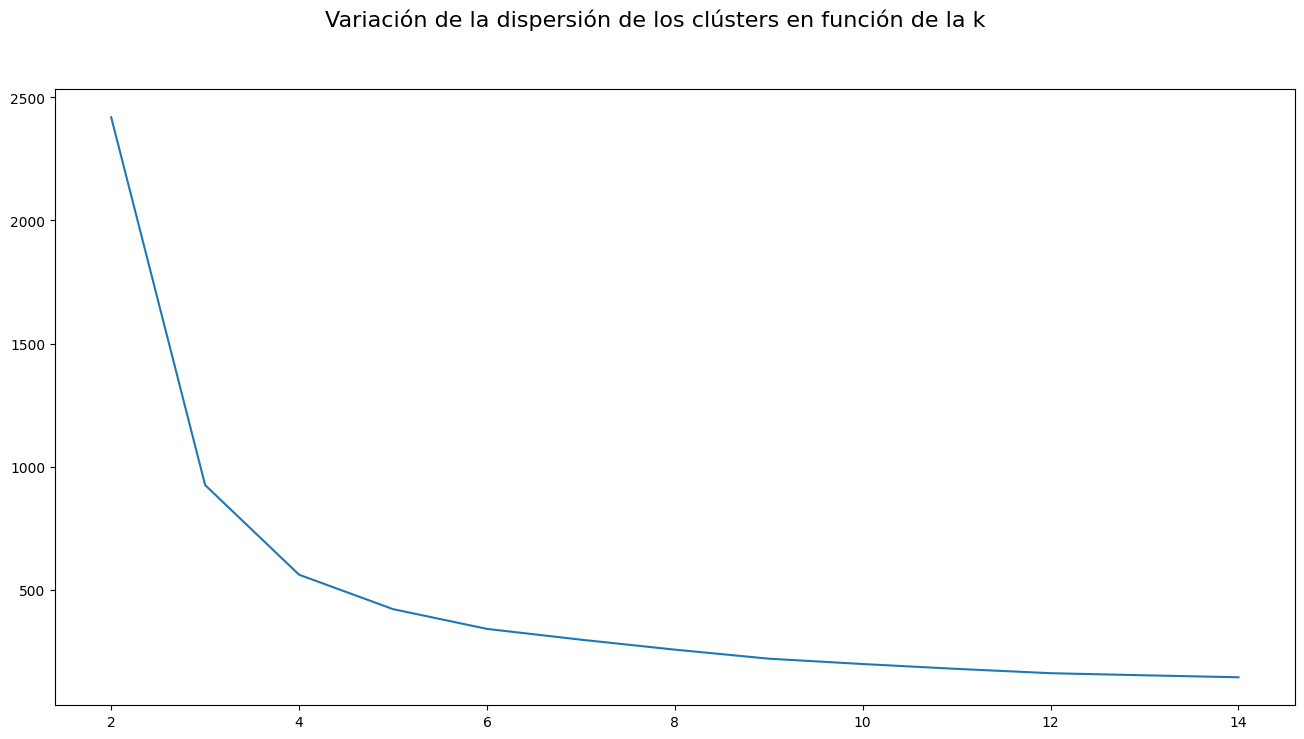

In [41]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [42]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("CustomTransformer", ProductIdFeatureGenerator),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 5, random_state = 175))
])

In [43]:
df.shape

(30490, 13)

In [44]:
pipe.fit(df)


Pipeline(steps=[('Imputer', KNNImputer()),
                ('CustomTransformer',
                 FunctionTransformer(func=<function build_unique_id_features at 0x7a1eb17e15a0>)),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=5, random_state=175))])

In [45]:
X_processed = pipe[:2].transform(df)


In [46]:
labels = pipe.predict(df)


In [47]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
X_processed["cluster"] = labels

In [48]:
X_processed.shape


(3049, 9)

FICHA


In [49]:
ficha_df = pd.DataFrame()


In [50]:
#for i, col in enumerate(["amount_sales", "last_purchase", "most_popular_items"]):
    #resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    #ficha_df = ficha_df.append(resumen_data)

In [51]:
resumen_data_list = []
for i, col in enumerate(["amount_sales", "last_sales", "most_popular_items", "less_popular_items"]):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    resumen_data_list.append(resumen_data)

ficha_df = pd.concat(resumen_data_list, ignore_index=True)


In [52]:
# generamos nuestro multiindex

out_index = [
    "Monetarios",
    "Frecuencia",
    "Popularidad",
    "Popularidad"
]

inner_index = [
    "Importe",
    "tiempo última venta",
    "Top ventas",
    "Peores ventas"

]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))


In [53]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [54]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [55]:
ficha_df = ficha_df.rename(columns = {
    0 : "items mayores ingresos",
    1 : "items Menos ppopulares",
    2 : "items Mas populares",
    3 : "items menor stock",
    4 : "Items mayor stock"
})

In [56]:
ficha_df.head(29)

cluster                                            items mayores ingresos  \
Grupo Indicadores Indicador           Estadístico                           
Monetarios        Importe             Media                    490,060.22   
                                      Desviación               262,606.78   
                                      Mínimo                   268,227.35   
                                      Perc. 25                 331,979.75   
                                      Perc. 50                 396,496.86   
                                      Perc. 75                 539,644.16   
                                      Máximo                 1,691,829.50   
Frecuencia        tiempo última venta Media                      1,558.61   
                                      Desviación                   378.09   
                                      Mínimo                       112.00   
                                      Perc. 25                   1,335.25   
                                      Perc. 50                   1,771.00   
                                      Perc. 75                   1,841.00   
                                      Máximo                     1,841.00   
Popularidad       Top ventas          Media                          0.00   
                                      Desviación                     0.00   
                                      Mínimo                         0.00   
                                      Perc. 25                       0.00   
                                      Perc. 50                       0.00   
                                      Perc. 75                       0.00   
                                      Máximo                         0.00   
                  Peores ventas       Media                          0.00   
                                      Desviación                     0.00   
                                      Mínimo                         0.00   
                                      Perc. 25                       0.00   
                                      Perc. 50                       0.00   
                                      Perc. 75                       0.00   
                                      Máximo                         0.00   

cluster                                            items Menos ppopulares  \
Grupo Indicadores Indicador           Estadístico                           
Monetarios        Importe             Media                     52,275.91   
                                      Desviación                34,061.75   
                                      Mínimo                    16,649.21   
                                      Perc. 25                  26,586.23   
                                      Perc. 50                  33,937.16   
                                      Perc. 75                  70,484.18   
                                      Máximo                   128,949.60   
Frecuencia        tiempo última venta Media                        565.13   
                                      Desviación                   435.25   
                                      Mínimo                        49.00   
                                      Perc. 25                     262.50   
                                      Perc. 50                     469.00   
                                      Perc. 75                     843.50   
                                      Máximo                     1,379.00   
Popularidad       Top ventas          Media                          0.00   
                                      Desviación                     0.00   
                                      Mínimo                         0.00   
                                      Perc. 25                       0.00   
                                      Perc. 50                       0.00   
                                      Perc. 75                       0.0

In [57]:
(
    X_processed
    .groupby("cluster")
    .describe()
    .T
    .style.background_gradient(cmap = 'Blues', axis = 1)
)

In [58]:
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [59]:
tamaño_clusters.head(15)

,,cluster,0,1,2,3,4
Grupo Indicadores,Indicador,Estadístico,,,,,
General,Clúster,Tamaño,120,15,15,1732,1167


In [60]:
#ficha_df = tamaño_clusters.append(ficha_df)

In [61]:
#ficha_df = pd.concat([ficha_df, tamaño_clusters], ignore_index=True)


In [62]:
ficha_df = ficha_df.rename(columns = {
    0 : "items mayores ingresos",
    1 : "items Menos ppopulares",
    2 : "items Mas populares",
    3 : "items menor stock",
    4 : "Items mayor stock"
})

In [63]:


ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)


# Nueva sección

Conclusiones

In [64]:
#El primer cluster aglutina los items con mas ingresos , mejor ticket promedio y con el precio promedio mas alto,
# el segundo aglutina los items menos vendidos,
# el tercero los mas  vendidos,
# el cuarto es un grupo que aglutina los items con mayor flujo de stock(menor tiempo stock) y con una rango de precios mayor,
# el quinto grupo aglutina una gran cantidad de items que tiene un mayor tiempo en stock (min=0).

In [68]:
X_processed

,n_sales,amount_sales,avg_ticket,price_evol,last_sales,first_sales,most_popular_items,less_popular_items,cluster
item,,,,,,,,,
ACCESORIES_1_001,10,"48,847.15","4,884.71",11.96,924.00,945.00,0.00,10.00,1
ACCESORIES_1_002,10,"26,712.03","2,671.20",5.28,"1,680.00","1,806.00",0.00,0.00,3
ACCESORIES_1_003,10,"5,668.39",566.84,3.95,413.00,742.00,0.00,0.00,4
ACCESORIES_1_004,10,"223,658.76","22,365.88",5.69,"1,778.00","1,841.00",0.00,0.00,3
ACCESORIES_1_005,10,"56,904.82","5,690.48",3.90,"1,624.00","1,750.00",0.00,0.00,3
...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,10,"49,357.78","4,935.78",3.19,"1,288.00","1,841.00",0.00,0.00,3
SUPERMARKET_3_824,10,"24,675.30","2,467.53",2.96,"1,841.00","1,841.00",0.00,0.00,3
SUPERMARKET_3_825,10,"64,924.80","6,492.48",4.80,"1,827.00","1,841.00",0.00,0.00,3


In [69]:
gb_df= X_processed.groupby('cluster')

In [72]:
X_processed.sort_values(by='cluster', ascending=False).head(20)

,n_sales,amount_sales,avg_ticket,price_evol,last_sales,first_sales,most_popular_items,less_popular_items,cluster
item,,,,,,,,,
HOME_&_GARDEN_1_308,10,"13,585.05","1,358.51",8.68,210.00,406.00,0.00,0.00,4
HOME_&_GARDEN_2_005,10,"5,175.99",517.60,6.84,567.00,770.00,0.00,0.00,4
SUPERMARKET_2_374,10,"76,638.46","7,663.85",2.33,147.00,"1,841.00",0.00,0.00,4
SUPERMARKET_2_375,10,"75,969.84","7,596.98",5.80,266.00,"1,841.00",0.00,0.00,4
SUPERMARKET_2_377,10,"18,016.88","1,801.69",3.29,140.00,623.00,0.00,0.00,4
HOME_&_GARDEN_1_540,10,"73,474.05","7,347.40",2.05,"1,078.00","1,267.00",0.00,0.00,4
SUPERMARKET_2_379,10,"23,360.66","2,336.07",8.38,98.00,532.00,0.00,0.00,4
HOME_&_GARDEN_1_536,10,"65,709.00","6,570.90",3.73,728.00,728.00,0.00,0.00,4
SUPERMARKET_3_768,10,"38,678.90","3,867.89",2.38,665.00,672.00,0.00,0.00,4


In [73]:
X_processed['cluster'].value_counts()

cluster
3    1732
4    1167
0     120
1      15
2      15
Name: count, dtype: int64

In [74]:
menos_populares =(X_processed['cluster']=='1')

In [77]:
filtered_data = X_processed[X_processed['cluster'] == 1]


In [78]:
filtered_data

,n_sales,amount_sales,avg_ticket,price_evol,last_sales,first_sales,most_popular_items,less_popular_items,cluster
item,,,,,,,,,
ACCESORIES_1_001,10,"48,847.15","4,884.71",11.96,924.00,945.00,0.00,10.00,1
SUPERMARKET_2_200,10,"27,459.79","2,745.98",4.77,259.00,"1,169.00",0.00,10.00,1
SUPERMARKET_2_201,10,"82,249.03","8,224.90",6.60,469.00,707.00,0.00,10.00,1
SUPERMARKET_2_202,10,"25,598.24","2,559.82",3.59,322.00,"1,841.00",0.00,10.00,1
SUPERMARKET_2_203,10,"16,649.21","1,664.92",3.81,140.00,"1,246.00",0.00,10.00,1
SUPERMARKET_2_204,10,"76,234.08","7,623.41",1.18,266.00,"1,841.00",0.00,10.00,1
SUPERMARKET_2_205,10,"25,712.66","2,571.27",3.32,"1,204.00","1,477.00",0.00,10.00,1
SUPERMARKET_2_206,10,"64,734.29","6,473.43",12.88,112.00,"1,680.00",0.00,10.00,1
SUPERMARKET_2_207,10,"33,471.50","3,347.15",8.01,763.00,"1,841.00",0.00,10.00,1


In [80]:
filtered_data2 = X_processed[X_processed['cluster'] == 2]
filtered_data2

,n_sales,amount_sales,avg_ticket,price_evol,last_sales,first_sales,most_popular_items,less_popular_items,cluster
item,,,,,,,,,
HOME_&_GARDEN_1_454,10,"19,798.76","1,979.88",3.71,"1,281.00","1,316.00",10.00,0.00,2
HOME_&_GARDEN_1_455,10,"30,034.12","3,003.41",3.71,714.00,714.00,10.00,0.00,2
HOME_&_GARDEN_1_456,10,"112,404.90","11,240.49",8.21,721.00,756.00,10.00,0.00,2
HOME_&_GARDEN_1_457,10,"193,742.02","19,374.20",12.46,952.00,"1,232.00",10.00,0.00,2
HOME_&_GARDEN_1_458,10,"59,247.51","5,924.75",3.09,"1,701.00","1,701.00",10.00,0.00,2
HOME_&_GARDEN_1_459,10,"208,901.70","20,890.17",1.23,"1,344.00","1,358.00",10.00,0.00,2
HOME_&_GARDEN_1_460,10,"106,182.61","10,618.26",4.96,"1,841.00","1,841.00",10.00,0.00,2
HOME_&_GARDEN_1_461,10,"36,159.17","3,615.92",1.21,"1,456.00","1,841.00",10.00,0.00,2
HOME_&_GARDEN_1_462,10,"96,904.28","9,690.43",2.52,896.00,"1,841.00",10.00,0.00,2


In [ ]:
filtered_data0 = X_processed[X_processed['cluster'] == 0]
filtered_data0

In [ ]:
for index in filtered_data0.index:
    item_value = filtered_data0.loc[index, 'cluster']  # Reemplaza 'columna1' con el nombre de la columna que te interesa
    print(f"Índice: {index}, Valor: {item_value}")


In [87]:
filtered_data3 = X_processed[X_processed['cluster'] == 3]


In [ ]:
for index in filtered_data3.index:
    item_value = filtered_data3.loc[index, 'cluster']  # Reemplaza 'columna1' con el nombre de la columna que te interesa
    print(f"Índice: {index}, Valor: {item_value}")

In [89]:
filtered_data4 = X_processed[X_processed['cluster'] == 4]


In [ ]:
for index in filtered_data4.index:
    item_value = filtered_data4.loc[index, 'cluster']  # Reemplaza 'columna1' con el nombre de la columna que te interesa
    print(f"Índice: {index}, Valor: {item_value}")